Name:   Anh Tuan Tran
Matrikelnummer:  7015463
Email:   antr00001@stud.uni-saarland.de
   
Name:   Deborah Dormah Kanubala
Matrikelnummer:   7025906
Email:  dkanubala@aimsammi.org

Name:    Irem Begüm Gündüz
Matrikelnummer:     7026821
Email: irgu00001@stud.uni-saarland.de   

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Important: We recommend that you use GPU(s) for these tasks. Google Colab is one such place where you could use GPU(s) for free for a certain duration.

# 10.2.1 Design your RNN (4 points)

Please create a ```solution.py``` file where you define the following:


1. A ```function``` where you use pytorch's Dataset and Dataloader class, and it should return you the desired split for the dataset. The function should have ```split``` as one of its argument and the call to Dataset class should respect this argument. You will manually need to download the dataset first. The desired role of function is as follows:
    - Use the ```Large Movie Review Dataset``` dataset. [Link](https://ai.stanford.edu/~amaas/data/sentiment)
    - Create Dataset object for different splits
    - Computers don't work with natural language, so we have to convert it to some sort of numbers. One such idea would be to use GloVe embeddings for the conversion. Depending on how you choose to do this, you might also have to take care of padding. **Note:** We encourage using the 300d GloVe embeddings.
    - Returns the Dataloader object for specified split
    - **(Optional)** Try one-hot encoding in-place of GloVe to see how big of an improvement GloVe was for embedding space. There are other (possible but not recommended) ways to do embeddings, such as get POS tags for each word or use a dictionary to define polarity for each word.
    
2. Multiple ```class``` for your implementation of your networks which does the following:
    - Define a RNN class with appropriate layers and hyperparameters
    - Define a LSTM class with appropriate layers and hyperparameters
    - **(Optionally)** Implement Bi-LSTM, Bi-RNN, Bi-GRU and do a comparison with the one-directional implementation


In [1]:
from solution import *
data_dir = "aclImdb_v1/aclImdb"
batch_size = 256    
vocab, vocab_size  = load_vocab(data_dir + '/imdb.vocab')

embedding_dim = 64
hidden_dim_rnn = 1024
hidden_dim_linear = [2048, 512, 256, 128]
output_dim = 1
n_rnn_layers = 2
bidirectional = False
max_length = 128
dropout = 0.05
device = 'cuda' if torch.cuda.is_available() else 'cpu'
num_workers = 8

model_name = 'test'
first_bach_training_only = False


# training setting
num_epochs = 30

learning_rate = 1e-3


### Train your model(s) by importing your implementation from ```solution.py``` file in this notebook

#### LSTM model with one-hot encoding

In [12]:
data_dir = "aclImdb_v1/aclImdb"
vocab, vocab_size  = load_vocab(data_dir + '/imdb.vocab')


bidirectional = False
rnn_type = "LSTM"
model_name = "LSTM_onehot"

torch.manual_seed(100)
random.seed(1)

# training setting
num_epochs = 30

learning_rate = 1e-3

# Train and test only with the first epoch (for debugging, parameter search purpose)
if first_bach_training_only:
        import copy
        train_loader = get_data_loader('train', batch_size, num_workers=num_workers, max_length=max_length, shuffle=False)
        test_loader = copy.deepcopy(train_loader)
else:
# Train on full data and evaluate on test set for every 3 training epoch
    train_loader = get_data_loader('train', batch_size, num_workers=num_workers, max_length=max_length, shuffle=True)
    test_loader = get_data_loader('test', batch_size, num_workers=num_workers, max_length=max_length, shuffle=True)
model = RNNClassifier(rnn_type, vocab_size, embedding_dim, hidden_dim_rnn, hidden_dim_linear, output_dim, n_rnn_layers, bidirectional, dropout).to(device)

# Load a check point
# ckpt_path = 'checkpoints/' + model_name + '.pth'
# if os.path.exists(ckpt_path):
#     print("load a pretrained checkpoint:", ckpt_path)
#     load_model(model, ckpt_path)

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses, test_losses = train_loop(num_epochs, train_loader, test_loader, model, device, model_name, criterion, optimizer, first_bach_training_only)

Epoch train time: 24.572808504104614
Epoch: 1, Loss: 0.7046
Epoch train time: 25.0588276386261
Epoch: 2, Loss: 0.6938
Epoch train time: 25.07331919670105
Epoch: 3, Loss: 0.6976
Evaluation time: 8.115670442581177
evaluation on test result: loss: 0.693585145230196 accuracy 50.468
Epoch train time: 24.743053913116455
Epoch: 4, Loss: 0.6902
Epoch train time: 24.79141879081726
Epoch: 5, Loss: 0.6679
Epoch train time: 24.67777967453003
Epoch: 6, Loss: 0.6139
Evaluation time: 8.208820819854736
evaluation on test result: loss: 0.6140060053796185 accuracy 68.74
Epoch train time: 24.91579031944275
Epoch: 7, Loss: 0.5039
Epoch train time: 24.939034938812256
Epoch: 8, Loss: 0.4242
Epoch train time: 24.759877920150757
Epoch: 9, Loss: 0.3589
Evaluation time: 8.16206431388855
evaluation on test result: loss: 0.45785760636232337 accuracy 79.244
Epoch train time: 24.804245471954346
Epoch: 10, Loss: 0.3108
Epoch train time: 24.88149929046631
Epoch: 11, Loss: 0.2593
Epoch train time: 24.70336151123047
Ep

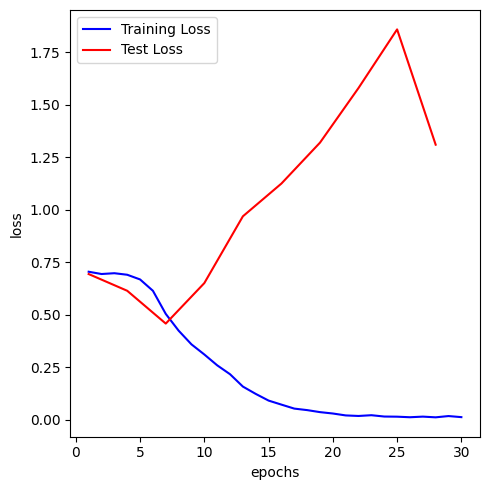

test set evaluation
test loss 1.3098610262481534 test accuracy 79.196
trainset set evaluation
train loss 0.0026883325410046975 train accuracy 99.944


In [16]:
# Plot the training, test accuracy
import matplotlib.pyplot as plt
epochs = range(1, len(train_losses) + 1)
test_epochs = range(1, len(train_losses), 3)
plt.figure(figsize=(5,5))
plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.plot(test_epochs, test_losses, 'r', label='Test Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.tight_layout()
plt.show()

# Full testset evaluation
print("test set evaluation")
loss, acc = evaluate(model, test_loader, criterion, device, -1, first_bach_training_only)
print ("test loss", loss, "test accuracy", acc)

# Full trainset evaluation
print("trainset set evaluation")
loss, acc = evaluate(model, train_loader, criterion, device, -1, first_bach_training_only)
print ("train loss", loss, "train accuracy", acc)

#### RNN with one-hot encoding

In [2]:
data_dir = "aclImdb_v1/aclImdb"
vocab, vocab_size  = load_vocab(data_dir + '/imdb.vocab')


bidirectional = False
rnn_type = "RNN"
model_name = "RNN_onehot"

torch.manual_seed(100)
random.seed(1)

# training setting
num_epochs = 30

learning_rate = 1e-4

# Train and test only with the first epoch (for debugging, parameter search purpose)
if first_bach_training_only:
        import copy
        train_loader = get_data_loader('train', batch_size, num_workers=num_workers, max_length=max_length, shuffle=False)
        test_loader = copy.deepcopy(train_loader)
else:
# Train on full data and evaluate on test set for every 3 training epoch
    train_loader = get_data_loader('train', batch_size, num_workers=num_workers, max_length=max_length, shuffle=True)
    test_loader = get_data_loader('train', batch_size, num_workers=num_workers, max_length=max_length, shuffle=True)
model = RNNClassifier(rnn_type, vocab_size, embedding_dim, hidden_dim_rnn, hidden_dim_linear, output_dim, n_rnn_layers, bidirectional, dropout).to(device)

# Load a check point
# ckpt_path = 'checkpoints/' + model_name + '.pth'
# if os.path.exists(ckpt_path):
#     print("load a pretrained checkpoint:", ckpt_path)
#     load_model(model, ckpt_path)

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses, test_losses = train_loop(num_epochs, train_loader, test_loader, model, device, model_name, criterion, optimizer, first_bach_training_only)

Epoch train time: 7.764716148376465
Epoch: 1, Loss: 0.7131
Epoch train time: 7.735467910766602
Epoch: 2, Loss: 0.6946
Epoch train time: 7.760127067565918
Epoch: 3, Loss: 0.6941
Evaluation time: 2.649052858352661
evaluation on test result: loss: 0.6933604314619181 accuracy 50.06
Epoch train time: 7.795206069946289
Epoch: 4, Loss: 0.6956
Epoch train time: 7.794696092605591
Epoch: 5, Loss: 0.6935
Epoch train time: 7.766758441925049
Epoch: 6, Loss: 0.6943
Evaluation time: 2.662374258041382
evaluation on test result: loss: 0.6937040680525254 accuracy 49.992
Epoch train time: 7.8691864013671875
Epoch: 7, Loss: 0.6936
Epoch train time: 7.909068584442139
Epoch: 8, Loss: 0.6938
Epoch train time: 7.912872076034546
Epoch: 9, Loss: 0.6935
Evaluation time: 2.6803460121154785
evaluation on test result: loss: 0.693320418498954 accuracy 51.036
Epoch train time: 7.8955159187316895
Epoch: 10, Loss: 0.6939
Epoch train time: 8.005199670791626
Epoch: 11, Loss: 0.6944
Epoch train time: 7.911088466644287
Epo

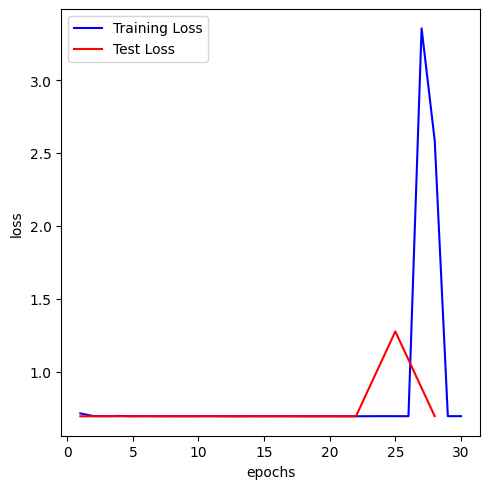

test set evaluation
test loss 0.6938486889917024 test accuracy 49.924
trainset set evaluation
train loss 0.6938239907731816 train accuracy 49.924


In [3]:
# Plot the training, test accuracy
import matplotlib.pyplot as plt
epochs = range(1, len(train_losses) + 1)
test_epochs = range(1, len(train_losses), 3)
plt.figure(figsize=(5,5))
plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.plot(test_epochs, test_losses, 'r', label='Test Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.tight_layout()
plt.show()

# Full testset evaluation
print("test set evaluation")
loss, acc = evaluate(model, test_loader, criterion, device, -1, first_bach_training_only)
print ("test loss", loss, "test accuracy", acc)

# Full trainset evaluation
print("trainset set evaluation")
loss, acc = evaluate(model, train_loader, criterion, device, -1, first_bach_training_only)
print ("train loss", loss, "train accuracy", acc)

### Comparison
We can see that RNN is much harder to train compared to LSTM, even fitting the training set is difficult

# 10.2.2 Transformers (3 points)

Let's fine-tune a Transformers based Model for the same task. We will use ```RoBERTa``` for the same. Note that for **converting text to some sort of numbers** you will need to use the tokenizer. HuggingFace has a nice introduction for the same [here](https://huggingface.co/course/chapter1/1)